In [1]:
import os
os.chdir("C:\\Users\\RAJA  IIT\\Desktop")

#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import scipy.stats  as stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest,f_regression
warnings.filterwarnings('ignore')

C:\Users\RAJA  IIT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Importing Dataset

In [4]:
df=pd.read_csv('UCI_credit_card.csv')  
df=df.rename(columns = {'default.payment.next.month':'default'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Null Value Imputation by Association Rules between Categorical Variables

#Encoding unknown values in Dataset to null

In [5]:
df.MARRIAGE=df.MARRIAGE.map({2:2,1:1,3:3,0:np.nan})

In [6]:
df['EDUCATION']=df.EDUCATION.map({1:1,2:2,3:3,4:4,0:np.nan,5:np.nan,6:np.nan})

In [7]:
df.isnull().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    345
MARRIAGE      54
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default        0
dtype: int64

In [8]:
df.corr()['MARRIAGE']

ID          -0.028871
LIMIT_BAL   -0.110498
SEX         -0.030152
EDUCATION   -0.147977
MARRIAGE     1.000000
AGE         -0.416497
PAY_0        0.019380
PAY_2        0.024105
PAY_3        0.032824
PAY_4        0.032733
PAY_5        0.035280
PAY_6        0.034025
BILL_AMT1   -0.025930
BILL_AMT2   -0.023697
BILL_AMT3   -0.027281
BILL_AMT4   -0.025576
BILL_AMT5   -0.027614
BILL_AMT6   -0.023386
PAY_AMT1    -0.005340
PAY_AMT2    -0.008895
PAY_AMT3    -0.003939
PAY_AMT4    -0.013440
PAY_AMT5    -0.002161
PAY_AMT6    -0.007600
default     -0.026224
Name: MARRIAGE, dtype: float64

#Chi-Square test for categorical variable(Relationship strength statistic)

In [9]:
import scipy.stats as scs


def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)

In [10]:
print(chi_square_of_df_cols(df, 'MARRIAGE', 'SEX')[0:2])

(28.759379116902064, 5.6882696176259936e-07)


In [11]:
print(chi_square_of_df_cols(df, 'MARRIAGE', 'EDUCATION')[0:2])

(1007.4736047881466, 2.1626589746860713e-214)


In [12]:
print(chi_square_of_df_cols(df, 'MARRIAGE', 'PAY_0')[0:2])

(119.75140652451385, 3.1703165001046241e-16)


In [13]:
print(chi_square_of_df_cols(df, 'MARRIAGE', 'PAY_3')[0:2])

(107.84627154908077, 4.8435116853809851e-14)


#Separating Null columns of 'MARRIAGE' attribute, going to use known set as training data and null set as test data. Hence e can predict null values on the basis of other variables with significant relation with 'MARRIAGE'

In [14]:
df1 = df[np.isfinite(df['MARRIAGE'])]
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2.0,1.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2.0,2.0,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1.0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1.0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df2=df[df['MARRIAGE'].isnull()==True]
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
218,219,110000.0,2,3.0,NaN,31,0,0,0,0,...,73315.0,63818.0,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0
809,810,160000.0,2,2.0,NaN,37,0,0,0,0,...,28574.0,27268.0,28021.0,35888.0,1325.0,891.0,1000.0,1098.0,426.0,0
820,821,200000.0,2,3.0,NaN,51,-1,-1,-1,-1,...,780.0,390.0,390.0,0.0,390.0,780.0,0.0,390.0,390.0,0
1019,1020,180000.0,2,3.0,NaN,45,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1443,1444,200000.0,1,3.0,NaN,51,-1,-1,-1,-1,...,2529.0,1036.0,4430.0,5020.0,9236.0,2529.0,0.0,4430.0,6398.0,0


In [16]:
y1=df1.MARRIAGE

In [17]:
df1=df1.drop('MARRIAGE',axis=1)
df2=df2.drop('MARRIAGE',axis=1)

In [18]:
df1=df1[['AGE','SEX','PAY_0','PAY_2','PAY_3']]
df2=df2[['AGE','SEX','PAY_0','PAY_2','PAY_3']]

In [19]:
clf = LogisticRegression()
clf.fit(df1,y1)
y_pred=clf.predict(df2)

In [20]:
y_pred

array([ 2.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,
        2.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,
        2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [21]:
df2['MARRIAGE']=y_pred

In [22]:
df2.head()

,AGE,SEX,PAY_0,PAY_2,PAY_3,MARRIAGE
218,31,2,0,0,0,2.0
809,37,2,0,0,0,1.0
820,51,2,-1,-1,-1,1.0
1019,45,2,-1,-1,-2,1.0
1443,51,1,-1,-1,-1,1.0


In [23]:
df1['MARRIAGE']=y1

In [24]:
df1=df1[['MARRIAGE']]
df2=df2[['MARRIAGE']]

In [25]:
df2.head()

,MARRIAGE
218,2.0
809,1.0
820,1.0
1019,1.0
1443,1.0


In [26]:
df1.head()

,MARRIAGE
0,1.0
1,2.0
2,2.0
3,1.0
4,1.0


In [27]:
B=pd.concat([df1,df2])

In [28]:
B.sort_index(inplace=True)

In [29]:
df.MARRIAGE=B

#Repeating the same for EDUCATION

In [30]:
df.corr()['EDUCATION']

ID           0.030195
LIMIT_BAL   -0.244360
SEX          0.012584
EDUCATION    1.000000
MARRIAGE    -0.148182
AGE          0.187570
PAY_0        0.123181
PAY_2        0.142972
PAY_3        0.136138
PAY_4        0.128501
PAY_5        0.115204
PAY_6        0.102788
BILL_AMT1    0.004191
BILL_AMT2    0.000512
BILL_AMT3   -0.004419
BILL_AMT4   -0.015327
BILL_AMT5   -0.019113
BILL_AMT6   -0.016165
PAY_AMT1    -0.045338
PAY_AMT2    -0.038943
PAY_AMT3    -0.052136
PAY_AMT4    -0.043463
PAY_AMT5    -0.049799
PAY_AMT6    -0.053887
default      0.048248
Name: EDUCATION, dtype: float64

In [31]:
print(chi_square_of_df_cols(df, 'EDUCATION', 'SEX')[0:2])

(23.309035244977899, 3.481513503146472e-05)


In [32]:
print(chi_square_of_df_cols(df, 'EDUCATION', 'MARRIAGE')[0:2])

(1008.7751670394927, 1.1310363876765278e-214)


In [33]:
print(chi_square_of_df_cols(df, 'EDUCATION', 'PAY_0')[0:2])

(1182.4880825287928, 1.2609302976502225e-229)


In [34]:
print(chi_square_of_df_cols(df, 'EDUCATION', 'PAY_2')[0:2])

(1376.760857338455, 6.8909556722310616e-271)


In [35]:
df1 = df[np.isfinite(df['EDUCATION'])]
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2.0,1.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2.0,2.0,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1.0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1.0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [36]:
df2=df[df['EDUCATION'].isnull()==True]
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
47,48,150000.0,2,NaN,2.0,46,0,0,-1,0,...,1170.0,0.0,0.0,1013.0,1170.0,0.0,0.0,0.0,0.0,1
69,70,20000.0,1,NaN,2.0,22,2,0,0,0,...,18085.0,11205.0,5982.0,0.0,1200.0,1000.0,500.0,1000.0,0.0,0
385,386,410000.0,2,NaN,1.0,42,0,0,0,0,...,240865.0,234939.0,240176.0,15000.0,14000.0,9000.0,8500.0,9000.0,8300.0,0
502,503,230000.0,2,NaN,2.0,46,0,0,0,0,...,186635.0,189896.0,193351.0,10000.0,9000.0,8000.0,8000.0,7500.0,7000.0,0
504,505,30000.0,1,NaN,1.0,53,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [37]:
y1=df1.EDUCATION

In [38]:
df1=df1.drop('EDUCATION',axis=1)
df2=df2.drop('EDUCATION',axis=1)

In [39]:
df1=df1[['AGE','SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5']]
df2=df2[['AGE','SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5']]

In [40]:
clf = LogisticRegression()
clf.fit(df1,y1)
y_pred=clf.predict(df2)

In [41]:
y_pred

array([ 2.,  2.,  2.,  2.,  1.,  3.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,
        1.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,
        2.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  1.,  2.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,
        1.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        1.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
        2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,
        2.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,
        2.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  3.,  2.,  1.,  2.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1

In [42]:
df2['EDUCATION']=y_pred
df1['EDUCATION']=y1

In [43]:
df1=df1[['EDUCATION']]
df2=df2[['EDUCATION']]

In [44]:
df1.head()

,EDUCATION
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [45]:
df2.head()

,EDUCATION
47,2.0
69,2.0
385,2.0
502,2.0
504,1.0


In [46]:
B=pd.concat([df1,df2])
B.sort_index(inplace=True)


In [47]:
df.EDUCATION=B

In [48]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [49]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.816833,1.554500,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.708919,0.518239,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Visualization

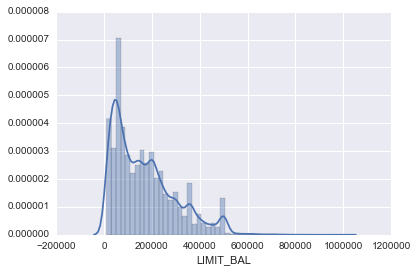

In [50]:
sns.distplot(df['LIMIT_BAL'],kde=True)

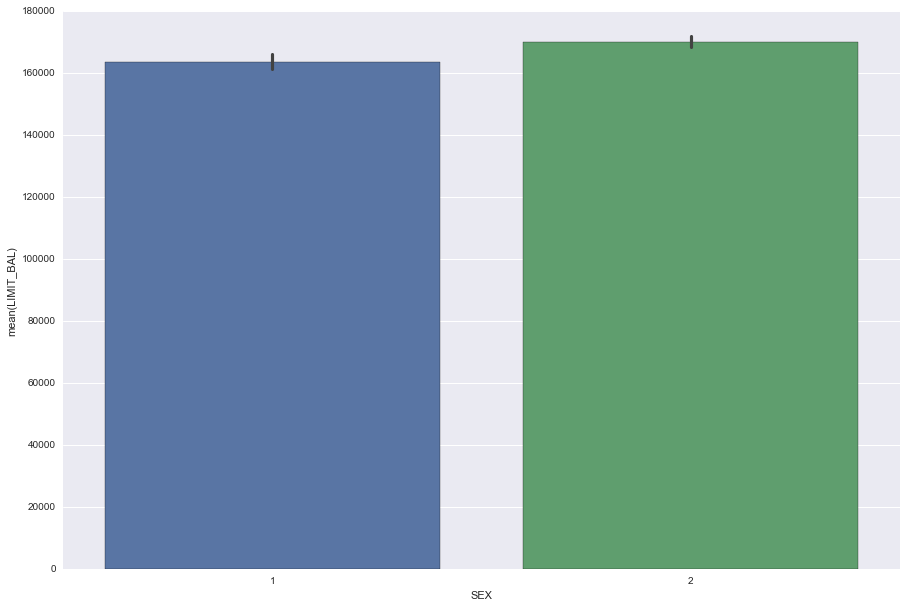

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x='SEX',y='LIMIT_BAL', data=df,ax=ax)

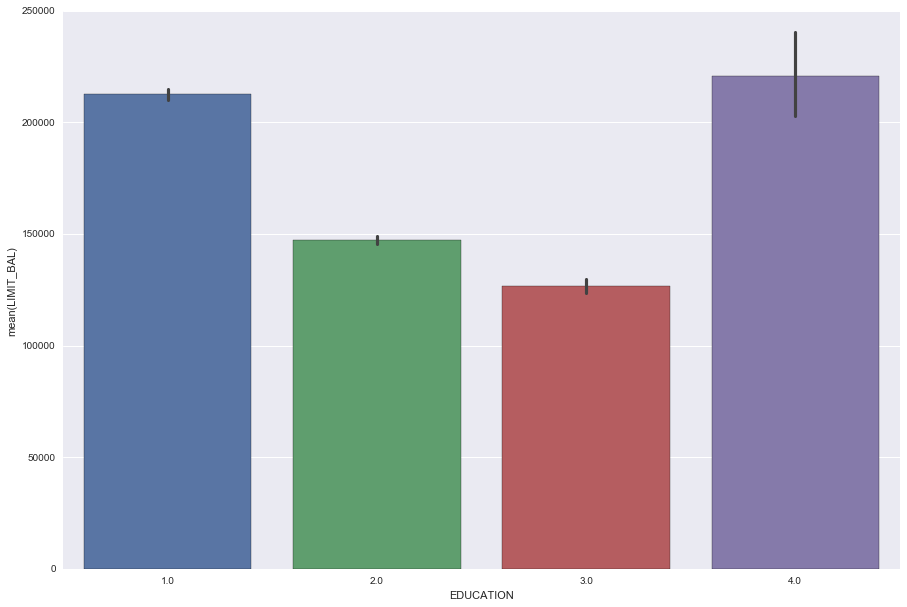

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x='EDUCATION',y='LIMIT_BAL', data=df,ax=ax)

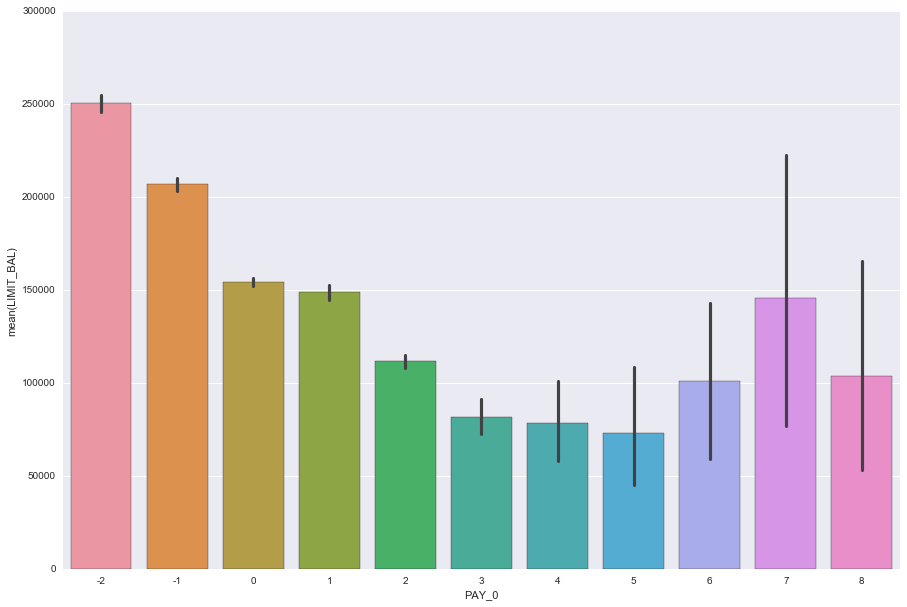

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x='PAY_0',y='LIMIT_BAL', data=df,ax=ax)

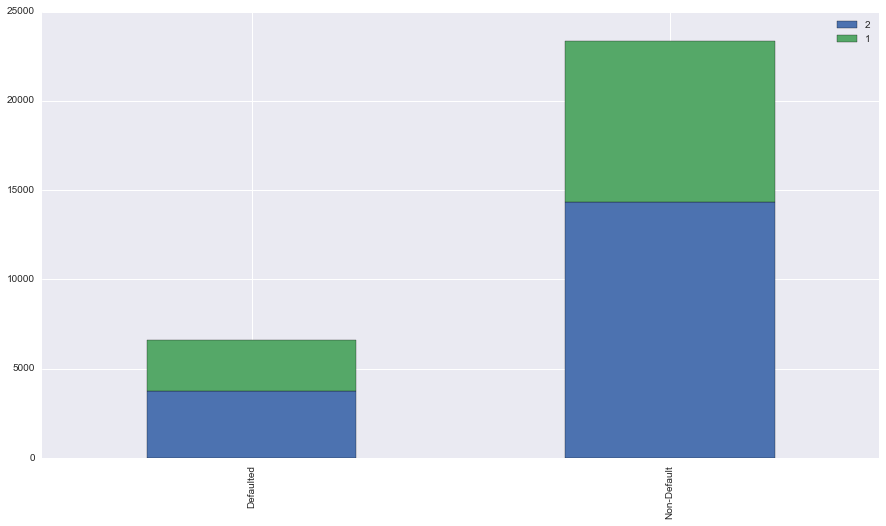

In [54]:
default_sex = df[df['default']==1]['SEX'].value_counts()
nondefault_sex = df[df['default']==0]['SEX'].value_counts()
df1 = pd.DataFrame([default_sex,nondefault_sex])
df1.index = ['Defaulted','Non-Default']
df1.plot(kind='bar',stacked=True, figsize=(15,8))

In [55]:
df['Encode1']=df.EDUCATION.map({1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown',0:'Illiterate'})

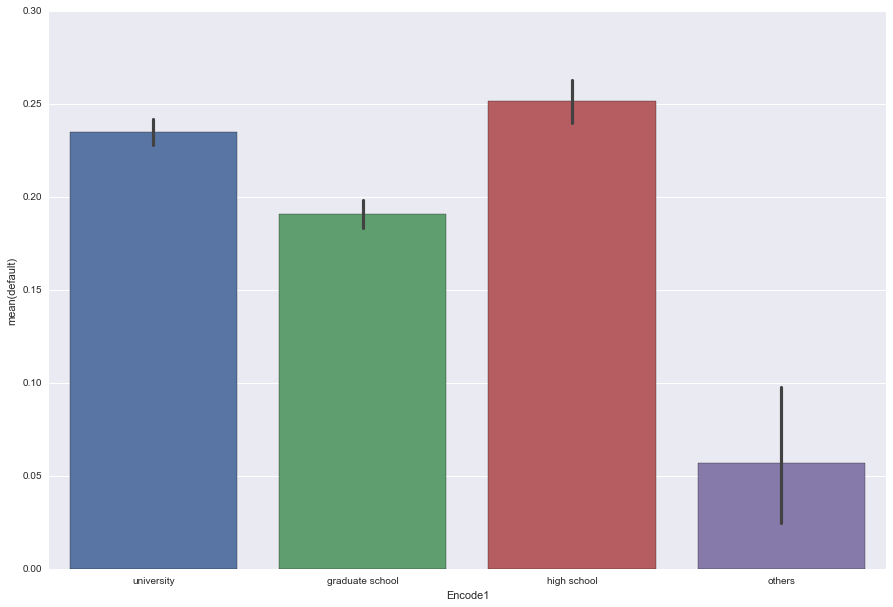

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x="Encode1", y="default", data=df,ax=ax)

In [57]:
df['Encode2']=df.MARRIAGE.map({1:'Married',2:'Single',3:'Others',0:'Unknown'})

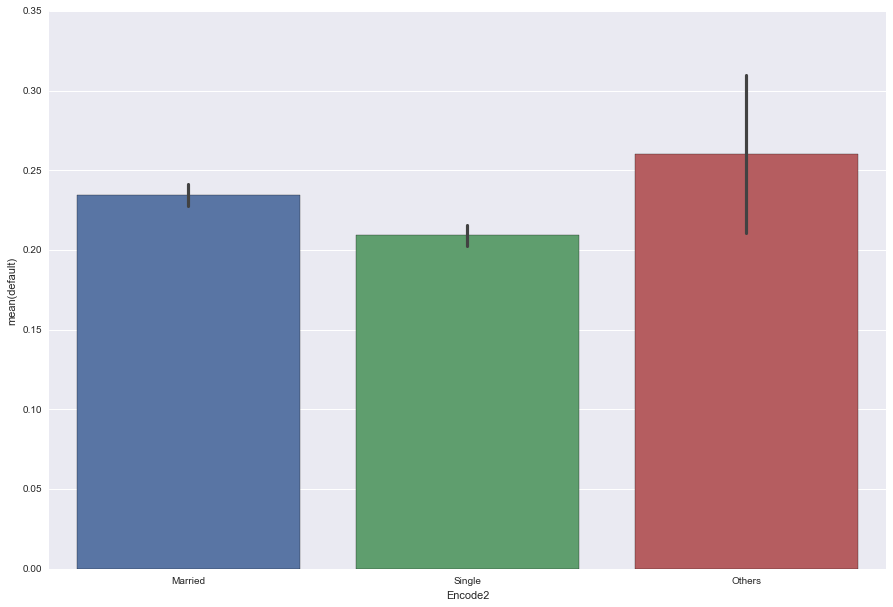

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x="Encode2", y="default", data=df,ax=ax)

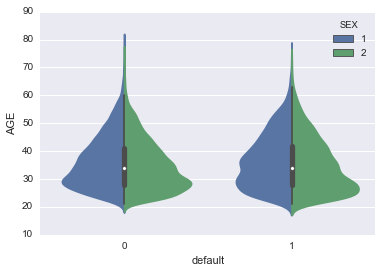

In [59]:
sns.violinplot(x="default", y='AGE', hue="SEX", data=df, split=True)

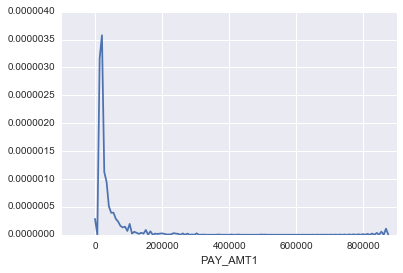

In [61]:
sns.distplot(df['PAY_AMT1'],hist=False,kde=True)

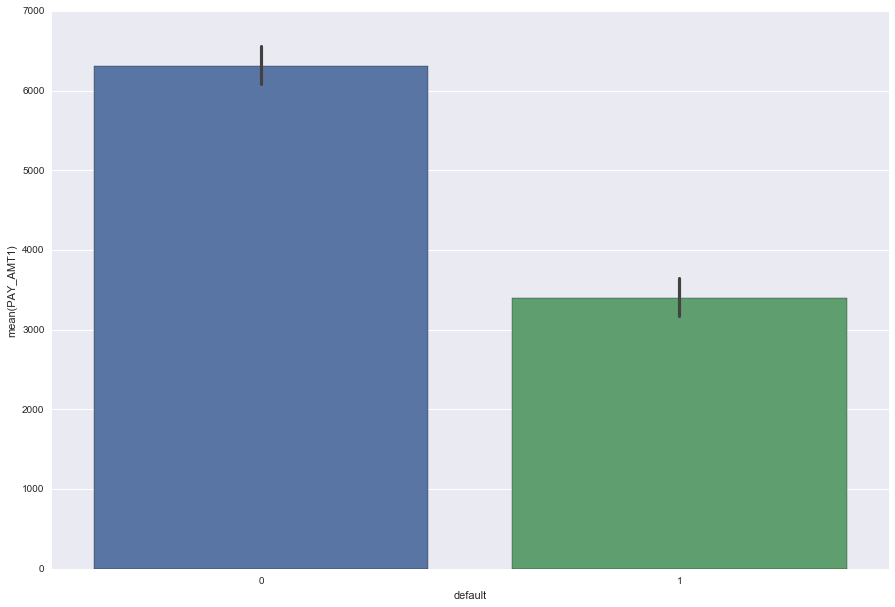

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x='default',y='PAY_AMT1', data=df,ax=ax)

In [63]:
#Pairplot

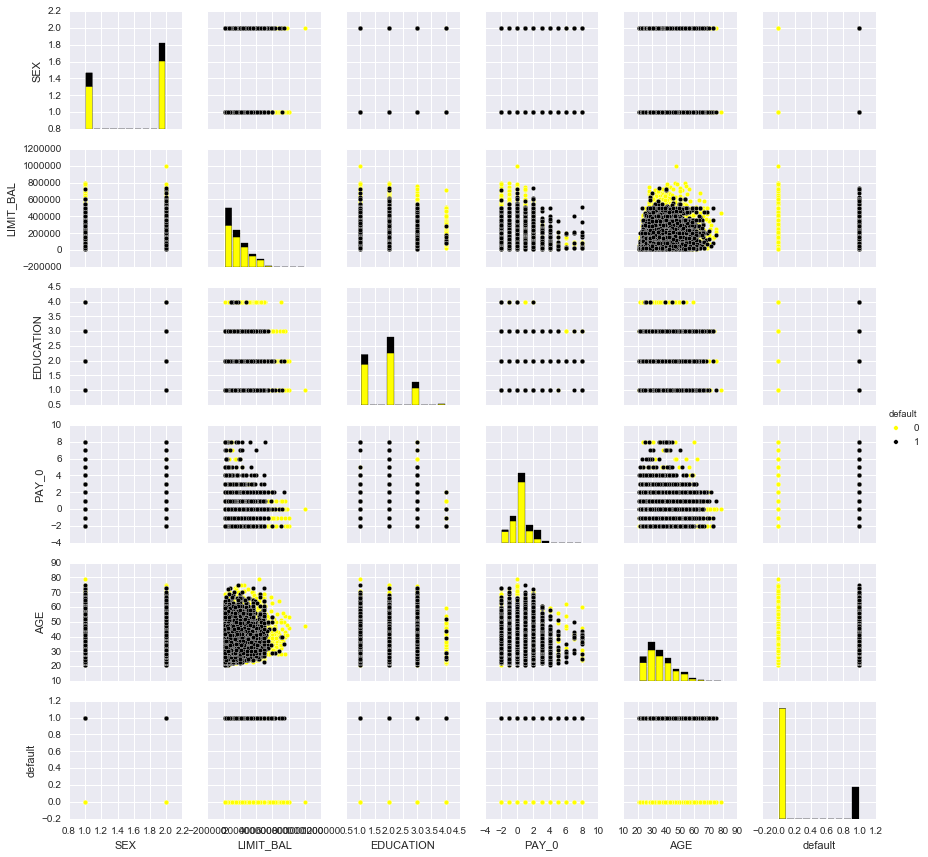

In [64]:
sns.pairplot(df[['SEX', 'LIMIT_BAL', 'EDUCATION', 'PAY_0', 'AGE','default']], hue='default', size=2,palette={1:'black',0:'yellow'})

In [65]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'Encode1', 'Encode2', 'LogPay'],
      dtype='object')

# Feature Engineering

In [66]:
df.drop(['Encode1', 'Encode2', 'LogPay'],axis=1,inplace=True)

In [67]:
df['PayBill1']=df['BILL_AMT1']*df['PAY_0']
df['PayBill2']=df['BILL_AMT2']*df['PAY_2']
df['PayBill3']=df['BILL_AMT3']*df['PAY_3']
df['PayBill4']=df['BILL_AMT4']*df['PAY_4']
df['PayBill5']=df['BILL_AMT5']*df['PAY_5']
df['PayBill6']=df['BILL_AMT6']*df['PAY_6']                                

In [68]:
df['PayPay1']=df['PAY_AMT1']*df['PAY_0']
df['PayPay2']=df['PAY_AMT2']*df['PAY_2']
df['PayPay3']=df['PAY_AMT3']*df['PAY_3']
df['PayPay4']=df['PAY_AMT4']*df['PAY_4']
df['PayPay5']=df['PAY_AMT5']*df['PAY_5']
df['PayPay6']=df['PAY_AMT6']*df['PAY_6']                                

#Two Sided p-value test

In [69]:
Column=df.columns
for col in Column:
    df_pval = pd.ols(y=df['default'], x=df[col], intercept=True)
    print('{} : {}'.format(col,df_pval.f_stat['p-value']) )

ID : 0.015667669165235987
LIMIT_BAL : 1.1102230246251565e-16
SEX : 4.395261932188532e-12
EDUCATION : 1.1102230246251565e-16
MARRIAGE : 5.961037754076415e-06
AGE : 0.01613684589199993
PAY_0 : 1.1102230246251565e-16
PAY_2 : 1.1102230246251565e-16
PAY_3 : 1.1102230246251565e-16
PAY_4 : 1.1102230246251565e-16
PAY_5 : 1.1102230246251565e-16
PAY_6 : 1.1102230246251565e-16
BILL_AMT1 : 0.000667329549124851
BILL_AMT2 : 0.013957362392598038
BILL_AMT3 : 0.014769982710005292
BILL_AMT4 : 0.07855564157691719
BILL_AMT5 : 0.241634442913076
BILL_AMT6 : 0.3521225211968777
PAY_AMT1 : 1.1102230246251565e-16
PAY_AMT2 : 1.1102230246251565e-16
PAY_AMT3 : 1.1102230246251565e-16
PAY_AMT4 : 1.1102230246251565e-16
PAY_AMT5 : 1.1102230246251565e-16
PAY_AMT6 : 1.1102230246251565e-16
default : 0.0
PayBill1 : 1.1102230246251565e-16
PayBill2 : 1.1102230246251565e-16
PayBill3 : 1.1102230246251565e-16
PayBill4 : 1.1102230246251565e-16
PayBill5 : 1.1102230246251565e-16
PayBill6 : 1.1102230246251565e-16
PayPay1 : 1.11022

In [70]:
df[['LIMIT_BAL','MARRIAGE','EDUCATION', 'PAY_0',
       'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3','PayBill1','PayBill2','PayBill3','PayBill4','PayBill5','PayBill6','default']].corr()

,LIMIT_BAL,MARRIAGE,EDUCATION,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PayBill1,PayBill2,PayBill3,PayBill4,PayBill5,PayBill6,default
LIMIT_BAL,1.000000,-0.110292,-0.242746,-0.271214,-0.296382,-0.286123,0.285430,0.278314,0.283236,-0.007089,-0.021389,-0.041870,-0.059848,-0.052143,-0.050414,-0.153520
MARRIAGE,-0.110292,1.000000,-0.149077,0.019621,0.024189,0.033037,-0.025670,-0.023381,-0.026976,-0.021463,-0.023459,-0.013644,-0.013649,-0.011475,-0.014142,-0.026138
EDUCATION,-0.242746,-0.149077,1.000000,0.125241,0.145400,0.138673,0.006529,0.003087,-0.001970,0.030233,0.028580,0.027399,0.029843,0.015400,0.012381,0.048770
PAY_0,-0.271214,0.019621,0.125241,1.000000,0.672164,0.574245,0.187068,0.189859,0.179785,0.487506,0.418755,0.351143,0.317305,0.293100,0.256419,0.324794
PAY_2,-0.296382,0.024189,0.145400,0.672164,1.000000,0.766552,0.234887,0.235257,0.224146,0.387908,0.488559,0.388882,0.341192,0.315568,0.275918,0.263551
PAY_3,-0.286123,0.033037,0.138673,0.574245,0.766552,1.000000,0.208473,0.237295,0.227494,0.298772,0.355999,0.464904,0.372191,0.322261,0.286981,0.235253
BILL_AMT1,0.285430,-0.025670,0.006529,0.187068,0.234887,0.208473,1.000000,0.951484,0.892279,0.282210,0.265612,0.219987,0.170994,0.165299,0.166083,-0.019644
BILL_AMT2,0.278314,-0.023381,0.003087,0.189859,0.235257,0.237295,0.951484,1.000000,0.928326,0.295818,0.256172,0.249528,0.191518,0.183779,0.184468,-0.014193
BILL_AMT3,0.283236,-0.026976,-0.001970,0.179785,0.224146,0.227494,0.892279,0.928326,1.000000,0.286169,0.261712,0.192420,0.215957,0.199074,0.192240,-0.014076
PayBill1,-0.007089,-0.021463,0.030233,0.487506,0.387908,0.298772,0.282210,0.295818,0.286169,1.000000,0.814468,0.647730,0.523472,0.468316,0.378763,0.222866


In [71]:
df.drop('ID',axis=1,inplace=True)

In [72]:
df.SEX=df.SEX.map({1:'male',2:'female'})
df.EDUCATION=df.EDUCATION.map({1:'graduate school',2:'University',3:'High School',4:'Others'})
df.MARRIAGE=df.MARRIAGE.map({1:'married',2:'single',3:'others'})

#One-Hot encoding Categorical columns

In [73]:
def encode_onehot(df, cols):
    vec = DictVectorizer()
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict('records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df
X = encode_onehot(df, cols=['SEX'])
X1 =encode_onehot(X, cols=['EDUCATION'])
X2 =encode_onehot(X1, cols=['MARRIAGE'])
X2.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'PayBill1', 'PayBill2',
       'PayBill3', 'PayBill4', 'PayBill5', 'PayBill6', 'PayPay1', 'PayPay2',
       'PayPay3', 'PayPay4', 'PayPay5', 'PayPay6', 'SEX=female', 'SEX=male',
       'EDUCATION=High School', 'EDUCATION=Others', 'EDUCATION=University',
       'EDUCATION=graduate school', 'MARRIAGE=married', 'MARRIAGE=others',
       'MARRIAGE=single'],
      dtype='object')

In [74]:
y=df.default

In [75]:
X=X2.drop(['default'],axis=1)

In [76]:
X.shape

(30000, 41)

In [77]:
X[['SEX=female','SEX=male',
       'EDUCATION=High School', 'EDUCATION=Others', 'EDUCATION=University',
       'EDUCATION=graduate school', 'MARRIAGE=married', 'MARRIAGE=others',
       'MARRIAGE=single']].replace(0,-1,inplace=True)

#Standard scaling to get Mean 0 and variance=1

In [78]:
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=3)

# Modelling Data: First by using 'l2' penalized Logistic Regression

In [80]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8245


In [103]:
c_testing =list(np.logspace(-2,4))
D=[]
for c in c_testing:
    clf = LogisticRegression(C=c)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    D.append(metrics.accuracy_score(y_test,y_pred))

In [110]:
D=np.around(D, decimals=5)

In [112]:
D

array([ 0.8245 ,  0.82417,  0.82383,  0.824  ,  0.824  ,  0.82417,
        0.82433,  0.82433,  0.824  ,  0.82433,  0.82433,  0.8245 ,
        0.82467,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,
        0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,
        0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,
        0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,
        0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,
        0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,  0.8245 ,
        0.8245 ,  0.8245 ])

In [113]:
Accuracy_Score=[]
for i in range(10,42):
    mod=SelectKBest(score_func=f_regression,k=i)
    X2=mod.fit_transform(X1,y)
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=3)
    clf = LogisticRegression(C=2)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Accuracy_Score.append(metrics.accuracy_score(y_test,y_pred))

In [120]:
Accuracy_Score

[0.82450000000000001,
 0.82450000000000001,
 0.82333333333333336,
 0.82416666666666671,
 0.82416666666666671,
 0.82350000000000001,
 0.82450000000000001,
 0.82450000000000001,
 0.82450000000000001,
 0.82450000000000001,
 0.82416666666666671,
 0.82416666666666671,
 0.82383333333333331,
 0.82416666666666671,
 0.82516666666666671,
 0.82516666666666671,
 0.82466666666666666,
 0.82516666666666671,
 0.82516666666666671,
 0.82533333333333336,
 0.82333333333333336,
 0.82333333333333336,
 0.82333333333333336,
 0.82333333333333336,
 0.82383333333333331,
 0.82366666666666666,
 0.82333333333333336,
 0.82433333333333336,
 0.82416666666666671,
 0.82416666666666671,
 0.82450000000000001,
 0.82450000000000001]

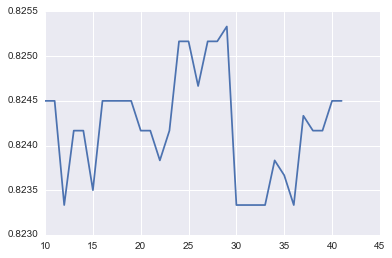

In [115]:
plt.plot(range(10,42),Accuracy_Score)

#Number of features=29 give the maximum accuracy of 82.53 for Logistic Regression Model

# SVM

#Modelling data iteratively by changing number of features used in the input, the maximum comes at number of features=16

In [84]:
Accuracy_Score=[]
for i in range(10,18):
    mod=SelectKBest(score_func=f_regression,k=i)
    X2=mod.fit_transform(X1,y)
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=3)
    svc=SVC(C=2)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    Accuracy_Score.append(metrics.accuracy_score(y_test,y_pred))
Accuracy_Score

[0.83083333333333331,
 0.82983333333333331,
 0.83099999999999996,
 0.83083333333333331,
 0.83083333333333331,
 0.83116666666666672,
 0.83116666666666672,
 0.83066666666666666]

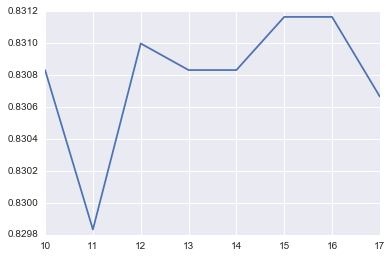

In [97]:
Accuracy_Score=[0.83083333333333331,0.82983333333333331, 0.83099999999999996,0.83083333333333331,
                 0.83083333333333331,0.83116666666666672,0.83116666666666672,0.83066666666666666]
plt.plot(list(range(10,18)),Accuracy_Score)

#Accuracy Maximum at no. of features=16

# Gradient Boosted Trees (AdaBoost)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=3)

#Default AdaBoost model

In [101]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50)
model = clf.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.829333333333


#Again Selecting on basis of number of features

In [87]:
A=[]
from sklearn.ensemble import AdaBoostClassifier
for i in range(12,26):
    
    mod=SelectKBest(score_func=f_regression,k=i)
    X2=mod.fit_transform(X1,y)
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=3)
    clf = AdaBoostClassifier(n_estimators=90)
    model = clf.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    A.append(metrics.accuracy_score(y_test,y_predict))
A

[0.83333333333333337,
 0.83316666666666672,
 0.83316666666666672,
 0.83483333333333332,
 0.83333333333333337,
 0.83233333333333337,
 0.83299999999999996,
 0.83383333333333332,
 0.83233333333333337,
 0.83199999999999996,
 0.83099999999999996,
 0.83233333333333337,
 0.83166666666666667,
 0.83166666666666667]

#Maximum at n=15

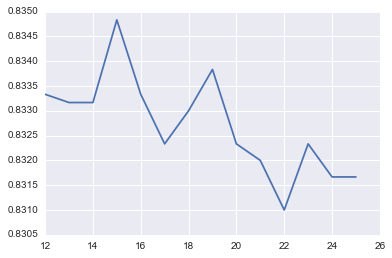

In [89]:
plt.plot(range(12,26),A)

#Summarizing, best SVM model with tuning comes at features=16, C=2 and kernel='rbf'

In [92]:
mod=SelectKBest(score_func=f_regression,k=16)
X2=mod.fit_transform(X1,y)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=3)
svc=SVC(C=2)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))


0.831166666667


In [93]:
mod=SelectKBest(score_func=f_regression,k=14)
X2=mod.fit_transform(X1,y)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=3)
A=[]
for i in range(75,95):
    clf = AdaBoostClassifier(n_estimators=i,learning_rate=.1)
    model = clf.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    A.append(metrics.accuracy_score(y_test,y_predict))
    
A

[0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83499999999999996,
 0.83483333333333332,
 0.83483333333333332,
 0.83483333333333332,
 0.83483333333333332,
 0.83483333333333332,
 0.83516666666666661,
 0.83483333333333332,
 0.83466666666666667,
 0.83483333333333332,
 0.83499999999999996]

#Number of trees= 90 gives the maximum metric score

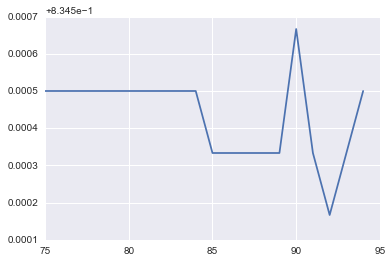

In [94]:
plt.plot(range(75,95),A)

#Maximum occurs at Learning Rate=.1 and n_est=90

#Best AdaBoost Model

In [96]:
mod=SelectKBest(score_func=f_regression,k=14)
X2=mod.fit_transform(X1,y)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=3)
clf = AdaBoostClassifier(n_estimators=90,learning_rate=.1)
model = clf.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.835166666667
